In [1]:
#Imports
import sys
sys.path.append('../../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

from datetime import datetime
import time as t

In [2]:
starttime = t.time()

data = dp.getXYdata_wXYerr('../data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (list(a) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1 = np.asarray(v_err1)
#Express as weights
weighdata = 1/v_err1

In [3]:
#keeping others but holding them constant
def f(r,M):
    return np.sqrt(nf.bh_v(r,M,load=True,path='../')**2 
                   + nf.h_v(r,load=True,path='../')**2 
                   + nf.b_v(r,load=True,path='../')**2 
                   + nf.d_v(r,load=True,path='../')**2)
#Only Black Hole
def bh(r,M):
    return nf.bh_v(r,M,load=True,path='../')

In [4]:
#Fit, Keeping rest constant

#Setup
l_mod = lm.Model(f)
l_params = l_mod.make_params()
#Black Hole Params
l_params.add('M', value=nf.Mbh_def, min=0) #Mass
#Do fit
l_fit = l_mod.fit(v_dat,l_params,r=r_dat,weights=weighdata)

In [5]:
#Fit, BH Only

#Setup
bh_mod = lm.Model(bh)
bh_params = bh_mod.make_params()
#Black Hole Params
bh_params.add('M', value=nf.Mbh_def, min=0) #Mass
#Do fit
bh_fit = bh_mod.fit(v_dat,bh_params,r=r_dat,weights=weighdata)

In [6]:
#Define curves to plot

l_dict = l_fit.best_values
l_M = l_dict['M']
l_curve = f(r_dat,l_M)

bh_dict = bh_fit.best_values
bh_M = bh_dict['M']
bh_curve = bh(r_dat,bh_M)

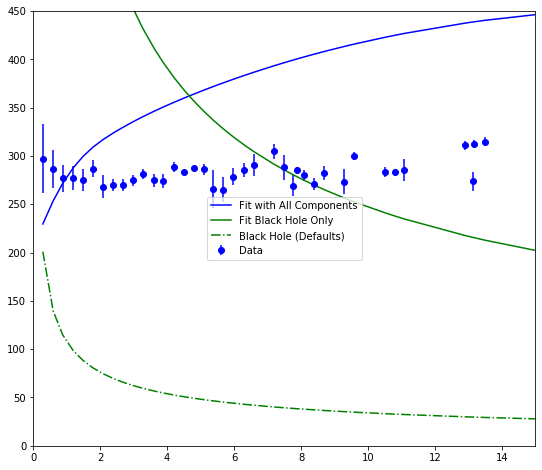

In [15]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,15)
plt.ylim(0,450)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,'b-',label='Fit with All Components')
plt.plot(r_dat,bh_curve,'g-',label='Fit Black Hole Only')

#plt.plot(r_dat,nf.bh_v(r_dat,l_M,load=True,path='../'),'b--',label='Black Hole Only, from All Components')
plt.plot(r_dat,nf.bh_v(r_dat,load=True,path='../'),'g-.',label='Black Hole (Defaults)')
#plt.plot(r_dat,nf.bh_v(r_dat,bh_M,load=True,path='../'),label='Fit Black Hole Only')

plt.legend()
plt.show()

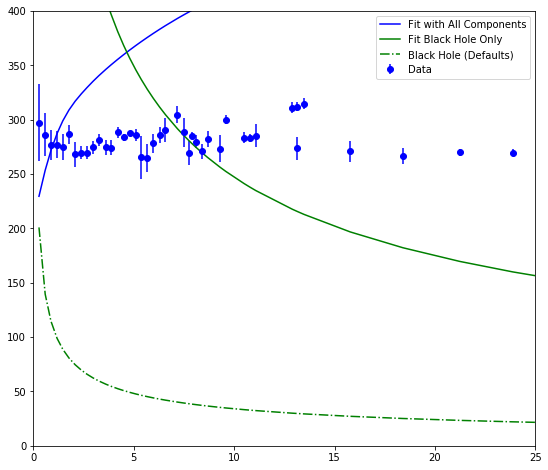

In [14]:
#Same plot, but zoomed in
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,25)
plt.ylim(0,400)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,'b-',label='Fit with All Components')
plt.plot(r_dat,bh_curve,'g-',label='Fit Black Hole Only')

#plt.plot(r_dat,nf.bh_v(r_dat,l_M,load=True,path='../'),'b--',label='Black Hole Only, from All Components')
plt.plot(r_dat,nf.bh_v(r_dat,load=True,path='../'),'g-.',label='Black Hole (Defaults)')
#plt.plot(r_dat,nf.bh_v(r_dat,bh_M,load=True,path='../'),label='Fit Black Hole Only')

plt.legend()
plt.show()

In [9]:
print('Fit information for all-component fit:')
l_fit

Fit information for all-component fit:


In [10]:
print('Fit information for single-component fit:')
bh_fit

Fit information for single-component fit:


In [11]:
endtime = t.time()
print('Total Time:')
print(str(endtime - starttime)+' seconds')
print('')

print('Timestamp:')
print(datetime.now())

Total Time:
1.2044355869293213 seconds

Timestamp:
2019-11-02 17:51:57.866633
